INFO511: Final Project: Data Science Job Trends 

Name: Gowtham Loganathan

Dataset: The dataset used for this project is "Data Science Job" dataset from Kaggle. 

Research Questions:

1.	How does city development index influence job-seeking behaviour in the data science field?

2.	What are the key trends in experience levels, education, and major disciplines among data science job seekers?

3.	How does training impact job-seeking trends in data science?



In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Gowtham\OneDrive\Documents\Gowtham_Root Folder\Gowtham_FEB_23_2024\UOA Class Notes\INFO 511 Foundations of Data Science\data_science_job.csv")

# Display the first few rows
print(df.head())



   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type  training_hours  \
0             STEM        20.0          NaN             NaN            36.0   
1             STEM        15.0        50-99         Pvt Ltd            47.0   
2          

In [3]:
# Show basic info to understand data types and missing values
print(df.info())                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB
None


In [4]:
# Fill missing numerical values with median
num_cols = ['experience', 'training_hours', 'city_development_index']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
cat_cols = ['gender', 'enrolled_university', 'education_level', 
            'major_discipline', 'company_size', 'company_type']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop duplicates
df = df.drop_duplicates()

# Confirm missing values are handled
print(df.isnull().sum())


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64


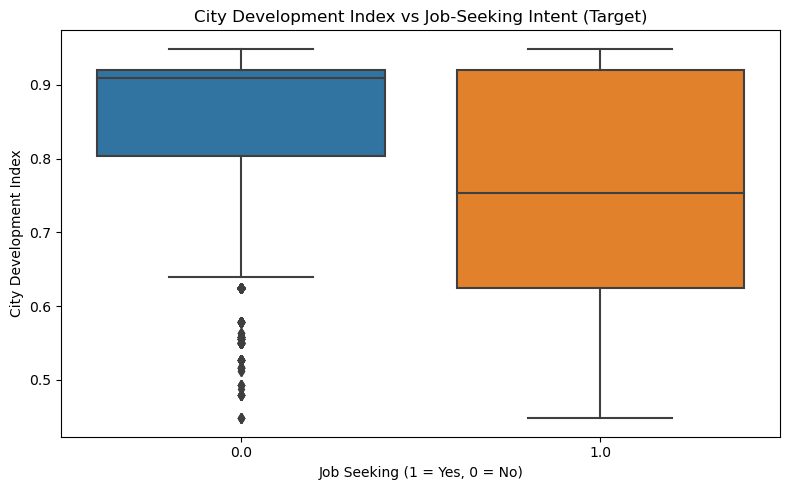

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot: City Development Index vs Job-Seeking Intent
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='city_development_index', data=df)
plt.title('City Development Index vs Job-Seeking Intent (Target)')
plt.xlabel('Job Seeking (1 = Yes, 0 = No)')
plt.ylabel('City Development Index')
plt.tight_layout()
plt.show()


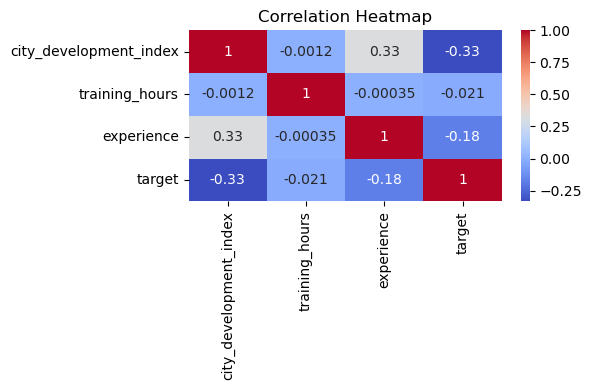

In [6]:
# Correlation heatmap including city index and target
plt.figure(figsize=(6, 4))
sns.heatmap(df[['city_development_index', 'training_hours', 'experience', 'target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

C:\Users\Gowtham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


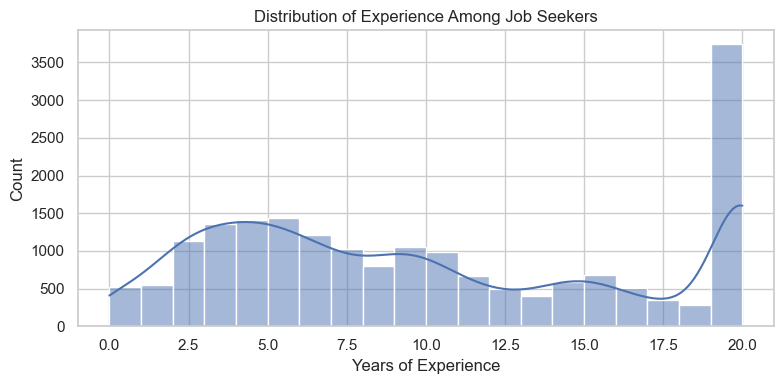

In [7]:
# Set visual style
sns.set(style="whitegrid")

# Histogram: Experience Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['experience'], bins=20, kde=True)
plt.title('Distribution of Experience Among Job Seekers')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




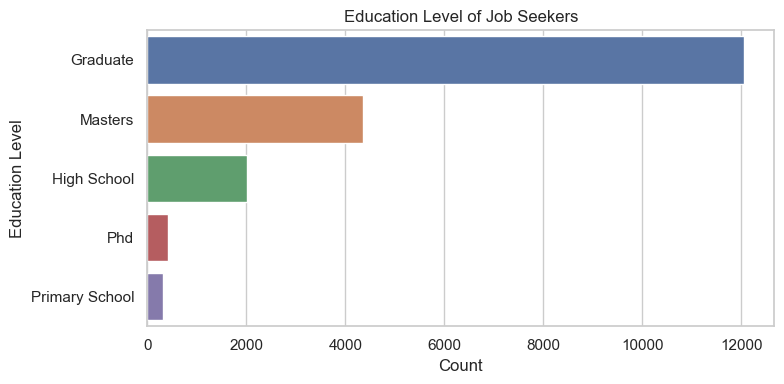

In [8]:
# Bar plot: Education Level
plt.figure(figsize=(8, 4))
sns.countplot(y='education_level', data=df, order=df['education_level'].value_counts().index)
plt.title('Education Level of Job Seekers')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()



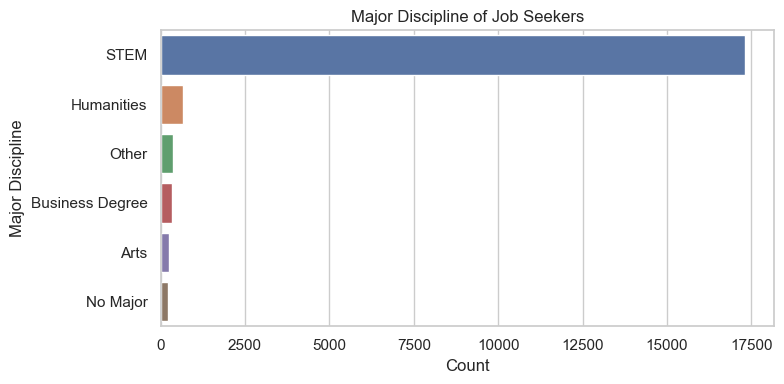

In [9]:
# Bar plot: Major Discipline
plt.figure(figsize=(8, 4))
sns.countplot(y='major_discipline', data=df, order=df['major_discipline'].value_counts().index)
plt.title('Major Discipline of Job Seekers')
plt.xlabel('Count')
plt.ylabel('Major Discipline')
plt.tight_layout()
plt.show()

C:\Users\Gowtham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


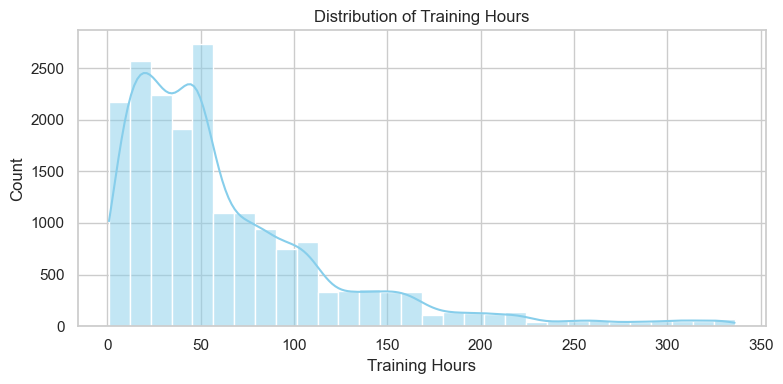

In [10]:
# Histogram: Training Hours Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['training_hours'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




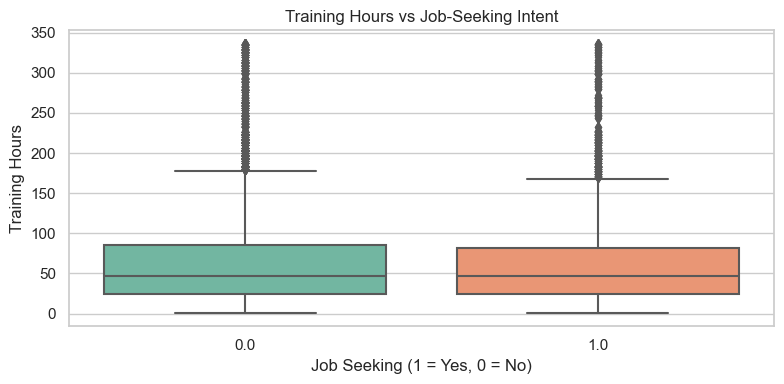

In [11]:
# Box Plot: Training Hours vs Job Seeking Intent
plt.figure(figsize=(8, 4))
sns.boxplot(x='target', y='training_hours', data=df, palette='Set2')
plt.title('Training Hours vs Job-Seeking Intent')
plt.xlabel('Job Seeking (1 = Yes, 0 = No)')
plt.ylabel('Training Hours')
plt.tight_layout()
plt.show()

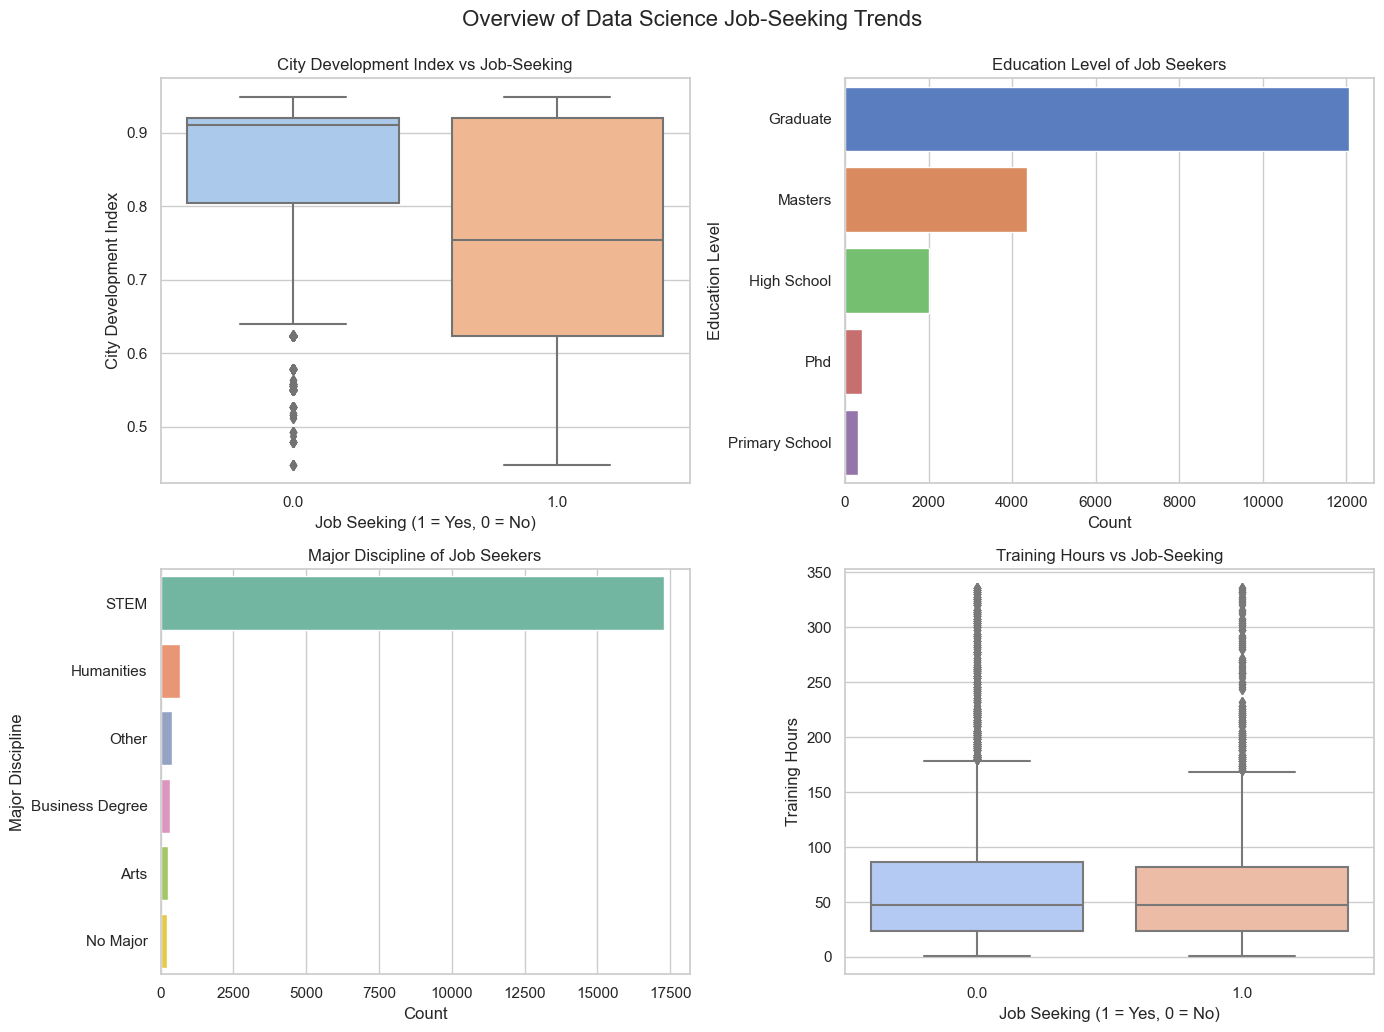

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set(style="whitegrid")

# 1. Box Plot - City Development Index vs Target
sns.boxplot(x='target', y='city_development_index', data=df, ax=axs[0, 0], palette='pastel')
axs[0, 0].set_title('City Development Index vs Job-Seeking')
axs[0, 0].set_xlabel('Job Seeking (1 = Yes, 0 = No)')
axs[0, 0].set_ylabel('City Development Index')

# 2. Bar Chart - Education Level
sns.countplot(y='education_level', data=df, order=df['education_level'].value_counts().index, ax=axs[0, 1], palette='muted')
axs[0, 1].set_title('Education Level of Job Seekers')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('Education Level')

# 3. Bar Chart - Major Discipline
sns.countplot(y='major_discipline', data=df, order=df['major_discipline'].value_counts().index, ax=axs[1, 0], palette='Set2')
axs[1, 0].set_title('Major Discipline of Job Seekers')
axs[1, 0].set_xlabel('Count')
axs[1, 0].set_ylabel('Major Discipline')

# 4. Box Plot - Training Hours vs Target
sns.boxplot(x='target', y='training_hours', data=df, ax=axs[1, 1], palette='coolwarm')
axs[1, 1].set_title('Training Hours vs Job-Seeking')
axs[1, 1].set_xlabel('Job Seeking (1 = Yes, 0 = No)')
axs[1, 1].set_ylabel('Training Hours')

# Adjust layout
plt.tight_layout()
plt.suptitle('Overview of Data Science Job-Seeking Trends', fontsize=16, y=1.03)
plt.show()
